In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Credit & Collection Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,training_ID,trainer_name,training_price,discount_training,training_session,number_of_participant,training_field,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,B0001,Ibun,6000000.00,50,17,18,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,B0002,Reza,6000000.00,50,17,20,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Manajemen Resiko APU & PPT bagi Staff Perbanka...
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,B0003,Ibun,6000000.00,50,17,20,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,B0004,Reza,6000000.00,50,17,19,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,B0005,Haris,6000000.00,50,17,19,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)


In [3]:
df = df[['level_training_process', 'total_payment',
       'interest_in_discount_program', 'training_price',
       'discount_training', 'training_session', 'group',
       'communication_quality', 'training_name', 'upselling']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   level_training_process        5000 non-null   int64  
 1   total_payment                 5000 non-null   float64
 2   interest_in_discount_program  5000 non-null   int64  
 3   training_price                5000 non-null   float64
 4   discount_training             5000 non-null   int64  
 5   training_session              5000 non-null   int64  
 6   group                         5000 non-null   object 
 7   communication_quality         5000 non-null   object 
 8   training_name                 5000 non-null   object 
 9   upselling                     5000 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 390.8+ KB


In [4]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object" :
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,level_training_process,total_payment,interest_in_discount_program,training_price,discount_training,training_session,group,communication_quality,training_name,upselling
0,0.44,0.96,1.60,0.36,1.09,1.14,0,0,5,5
1,0.44,1.18,1.60,0.36,1.09,1.14,0,0,5,4
2,0.44,1.18,1.60,0.36,1.09,1.14,0,0,5,5
3,0.44,1.07,1.60,0.36,1.09,1.14,0,0,5,5
4,0.44,1.07,1.60,0.36,1.09,1.14,0,0,5,5


In [5]:
X = df2.drop("upselling", axis=1)
y = df2["upselling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:19<00:00,  1.29it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -2.075450
[LightGBM] [Info] Start training from score -2.069491
[LightGBM] [Info] Start training from score -2.028748
[LightGBM] [Info] Start training from score -2.105786
[LightGBM] [Info] Start training from score -2.101687
[LightGBM] [Info] Start training from score -2.097606
[LightGBM] [Info] Start training from score -2.085460
[LightGBM] [Info] Start training from score -2.073459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.90,0.90,None,0.90,2.11
XGBClassifier,0.90,0.90,None,0.90,2.25
RandomForestClassifier,0.89,0.90,None,0.89,1.06
BaggingClassifier,0.89,0.89,None,0.89,0.13
KNeighborsClassifier,0.89,0.89,None,0.89,0.24
ExtraTreesClassifier,0.89,0.89,None,0.89,0.79
ExtraTreeClassifier,0.89,0.89,None,0.89,0.03
SVC,0.89,0.89,None,0.89,0.93
DecisionTreeClassifier,0.89,0.89,None,0.88,0.03


In [6]:
def evaluate_performa(X_test, y_test, model1, model2, model3, model4, model5):
    rate = [0, 0, 0, 0, 0]
    #difference = [0, 0, 0, 0, 0]

    X_test = X_test.reset_index(drop=True)
    for i, _ in X_test.iterrows():
        X = np.array(X_test.iloc[[i]])
        y = np.array(y_test.iloc[[i]])
        difference = [0, 0, 0, 0, 0]
        difference[0] = abs(model1.predict(X) - y[0])
        difference[1] = abs(model2.predict(X) - y[0])
        difference[2] = abs(model3.predict(X) - y[0])
        difference[3] = abs(model4.predict(X) - y[0])
        difference[4] = abs(model5.predict(X) - y[0])
        print(difference)

        a = int(np.argmin(difference))
        print(a)
        for i in range(len(difference)):
            if difference[a] == difference[i]:
                rate[i] += 1
    
    a = f"Best model : {rate.index(max(rate))+1}"
    return a, rate

In [7]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier 

forest = RandomForestClassifier()
bagging = BaggingClassifier()
extra = ExtraTreesClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier()

forest.fit(X_train, y_train)
bagging.fit(X_train, y_train)
extra.fit(X_train, y_train)
lgb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

a = evaluate_performa(X_test, y_test, forest, bagging, extra, lgb, xgb)
a

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -2.075450
[LightGBM] [Info] Start training from score -2.069491
[LightGBM] [Info] Start training from score -2.028748
[LightGBM] [Info] Start training from score -2.105786
[LightGBM] [Info] Start training from score -2.101687
[LightGBM] [Info] Start training from score -2.097606
[LightGBM] [Info] Start training from score -2.085460
[LightGBM] [Info] Start training from score -2.073459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

('Best model : 4', [996, 995, 987, 997, 997])

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate2(X_test, y_test, model1, model2, model3, model4, model5):
    result = {
        "Models Name": [],
        "Accuracy": [],
        "Precision Score": [],
        "Recall Score": [],
        "F1 Score": []
    }
    models = [model1, model2, model3, model4, model5]
    for i in range(5):
        y_pred = models[i].predict(X_test)
        result["Models Name"].append(models[i].__class__.__name__)
        result["Accuracy"].append(accuracy_score(y_test, y_pred))
        result["Precision Score"].append(precision_score(y_test, y_pred, average="micro"))
        result["Recall Score"].append(recall_score(y_test, y_pred, average="micro"))
        result["F1 Score"].append(f1_score(y_test, y_pred, average="micro"))
    
    result = pd.DataFrame(result)
    return result

result = evaluate2(X_test, y_test, forest, bagging, extra, lgb, xgb)
result

,Models Name,Accuracy,Precision Score,Recall Score,F1 Score
0,RandomForestClassifier,0.90,0.90,0.90,0.90
1,BaggingClassifier,0.90,0.90,0.90,0.90
2,ExtraTreesClassifier,0.89,0.89,0.89,0.89
3,LGBMClassifier,0.90,0.90,0.90,0.90
4,XGBClassifier,0.90,0.90,0.90,0.90


(0.4, 1.1)

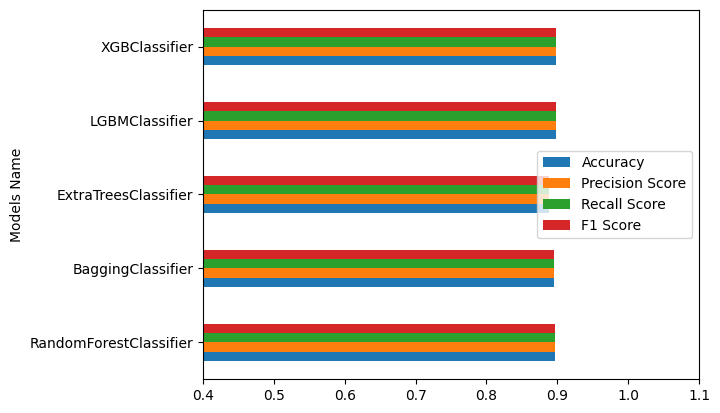

In [9]:
result.plot.barh(x="Models Name")
plt.xlim(0.4, 1.1)